## Discretisation

Discretisation is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that span the range of the variable's values. Discretisation is also called **binning**, where bin is an alternative name for interval.

### Discretisation helps handle outliers and may improve value spread in skewed variables

Discretisation helps handle outliers by placing these values into the lower or higher intervals, together with the remaining inlier values of the distribution. Thus, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval / bucket. In addition, by creating appropriate bins or intervals, discretisation can help spread the values of a skewed variable across a set of bins with equal number of observations


### Discretisation approaches

There are several approaches to transform continuous variables into discrete ones. Discretisation methods fall into 2 categories: **supervised and unsupervised**. Unsupervised methods do not use any information, other than the variable distribution, to create the contiguous bins in which the values will be placed. Supervised methods typically use target information in order to create the bins or intervals.


####  Unsupervised discretisation methods

- Equal width discretisation
- Equal frequency discretisation
- K-means discretisation

#### Supervised discretisation methods

- Discretisation using decision trees

# Equal Frequency discretisation

### pandas and NumPy
                                   pd.qcut(
    X_train['age'], 10, labels=None, retbins=True, precision=3, duplicates='raise')
                                    
### Feature-engine 

                          EqualFrequencyDiscretiser(q=10, variables = ['age', 'fare']) 

### Scikit-learn
                         KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import KBinsDiscretizer

from feature_engine.discretisers import EqualFrequencyDiscretiser

In [3]:
data = pd.read_csv('D:/ShakthiSai -Keerthana Learnings/AI and Machine Learning/Feature Engineering/titanic_train.csv',
                   usecols=['Age', 'Fare', 'Survived'])

data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
X=data[['Age', 'Fare']]
y=data['Survived']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [6]:
X_train.shape, X_test.shape

((623, 2), (268, 2))

## Remove missing values using random sample imputation method

In [7]:
def impute_na(data, variable):

    df = data.copy()

    # random sampling
    df[variable + '_random'] = df[variable]

    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + '_random'] = random_sample

    return df[variable + '_random']

In [8]:
# replace NA in both  train and test sets

X_train['Age'] = impute_na(data, 'Age')
X_test['Age'] = impute_na(data, 'Age')

X_train['Fare'] = impute_na(data, 'Fare')
X_test['Fare'] = impute_na(data, 'Fare')

C:\Users\Vikee\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vikee\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Vikee\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [9]:
X_train['Age'].isnull().sum()

0

In [10]:
X_train['Fare'].isnull().sum()

0

## 1) Equal frequency discretisation with Scikit-learn

#### strategy=quantile indicates equal width discretisation

In [11]:
equ_freqbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

equ_freqbins.fit(X_train[['Age', 'Fare']])

KBinsDiscretizer(encode='ordinal', n_bins=10)

In [17]:
equ_freqbins.bin_edges_

array([array([ 0.67, 13.2 , 19.  , 22.  , 26.  , 29.  , 32.  , 36.  , 41.6 ,
       49.  , 80.  ]),
       array([  0.     ,   7.72584,   7.88252,   8.05   ,  12.13   ,  15.     ,
        23.45   ,  27.75   ,  46.9    ,  77.17584, 512.3292 ])],
      dtype=object)

In [20]:
train_t =equ_freqbins.transform(X_train[['Age', 'Fare']])

train_t = pd.DataFrame(train_t, columns = ['Age', 'Fare'])
test_t = equ_freqbins.transform(X_test[['Age', 'Fare']])

test_t = pd.DataFrame(test_t, columns = ['Age', 'Fare'])

In [21]:
train_t.head()

,Age,Fare
0,9.0,6.0
1,9.0,8.0
2,0.0,8.0
3,9.0,9.0
4,1.0,4.0


In [22]:
test_t.head()

,Age,Fare
0,8.0,4.0
1,1.0,0.0
2,0.0,7.0
3,6.0,9.0
4,5.0,5.0


## 2) Equal frequency discretisation with Feature-engine

In [25]:
equ_freqbins1= EqualFrequencyDiscretiser(q=10, variables = ['Age', 'Fare'])

equ_freqbins1.fit(X_train)

EqualFrequencyDiscretiser(variables=['Age', 'Fare'])

In [26]:
equ_freqbins1.binner_dict_

{'Age': [-inf,
  13.200000000000003,
  19.0,
  22.0,
  26.0,
  29.0,
  32.0,
  36.0,
  41.60000000000002,
  49.0,
  inf],
 'Fare': [-inf,
  7.72584,
  7.88252,
  8.05,
  12.130000000000008,
  15.0,
  23.45,
  27.75,
  46.9,
  77.17584000000004,
  inf]}

In [27]:
train_t1 =equ_freqbins1.transform(X_train)
test_t1 = equ_freqbins1.transform(X_test)

In [28]:
train_t1.head()

,Age,Fare
857,9,6
52,8,8
386,0,7
124,9,9
578,1,4


In [29]:
test_t1.head()

,Age,Fare
495,8,4
648,1,0
278,0,7
31,6,9
255,4,5


## 3) Equal frequency discretisation with  Pandas and NUmpy

####  pandas qcut (quantile cut)

The pandas documentation describes qcut as a “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.

The simplest use of qcut is to define the number of quantiles and let pandas figure out how to divide up the data




In [15]:
qcutquantiles=pd.qcut(X_train['Age'], 10)  # to see the quantiles 

qcutquantiles1,intervals=pd.qcut(X_train['Age'], 10, retbins=True) 

 # to see quantiles along with intervals limits, set retbins = True


In [16]:
qcutquantiles

857     (49.0, 80.0]
52      (41.6, 49.0]
386    (0.669, 13.2]
124     (49.0, 80.0]
578     (13.2, 19.0]
           ...      
835     (36.0, 41.6]
192     (13.2, 19.0]
629     (26.0, 29.0]
559     (32.0, 36.0]
684     (49.0, 80.0]
Name: Age, Length: 623, dtype: category
Categories (10, interval[float64]): [(0.669, 13.2] < (13.2, 19.0] < (19.0, 22.0] < (22.0, 26.0] ... (32.0, 36.0] < (36.0, 41.6] < (41.6, 49.0] < (49.0, 80.0]]

In [17]:
qcutquantiles1

857     (49.0, 80.0]
52      (41.6, 49.0]
386    (0.669, 13.2]
124     (49.0, 80.0]
578     (13.2, 19.0]
           ...      
835     (36.0, 41.6]
192     (13.2, 19.0]
629     (26.0, 29.0]
559     (32.0, 36.0]
684     (49.0, 80.0]
Name: Age, Length: 623, dtype: category
Categories (10, interval[float64]): [(0.669, 13.2] < (13.2, 19.0] < (19.0, 22.0] < (22.0, 26.0] ... (32.0, 36.0] < (36.0, 41.6] < (41.6, 49.0] < (49.0, 80.0]]

In [18]:
intervals

array([ 0.67, 13.2 , 19.  , 22.  , 26.  , 29.  , 32.  , 36.  , 41.6 ,
       49.  , 80.  ])

In [19]:
qcutquantiles.value_counts()  # the frequencies are almost the same in each bin

(13.2, 19.0]     72
(22.0, 26.0]     71
(32.0, 36.0]     68
(41.6, 49.0]     66
(0.669, 13.2]    63
(26.0, 29.0]     62
(49.0, 80.0]     59
(29.0, 32.0]     55
(19.0, 22.0]     55
(36.0, 41.6]     52
Name: Age, dtype: int64

In [20]:
## to have lables instead of interval limits:

labels = ['Q'+str(i) for i in range(1,11)]
labels

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']

In [21]:
qcutquantiles1,intervals=pd.qcut(X_train['Age'], 10, retbins=True,labels=labels) 

In [22]:
qcutquantiles1.head()

857    Q10
52      Q9
386     Q1
124    Q10
578     Q2
Name: Age, dtype: category
Categories (10, object): [Q1 < Q2 < Q3 < Q4 ... Q7 < Q8 < Q9 < Q10]

In [25]:
# to transform the test set:
# we use pandas cut method (instead of qcut) and
# pass the quantile edges calculated in the training set

X_test['Age_disc_label'] = pd.cut(x = X_test['Age'], bins=intervals, labels=labels)
X_test['Age_disc'] = pd.cut(x = X_test['Age'], bins=intervals)

X_test.head(10)

C:\Users\Vikee\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Vikee\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Fare,Age_disc_label,Age_disc
495,42.0,14.4583,Q9,"(41.6, 49.0]"
648,18.0,7.5500,Q2,"(13.2, 19.0]"
278,7.0,29.1250,Q1,"(0.67, 13.2]"
31,35.0,146.5208,Q7,"(32.0, 36.0]"
255,29.0,15.2458,Q5,"(26.0, 29.0]"
298,28.0,30.5000,Q5,"(26.0, 29.0]"
609,40.0,153.4625,Q8,"(36.0, 41.6]"
318,31.0,164.8667,Q6,"(29.0, 32.0]"
484,25.0,91.0792,Q4,"(22.0, 26.0]"
367,32.0,7.2292,Q6,"(29.0, 32.0]"


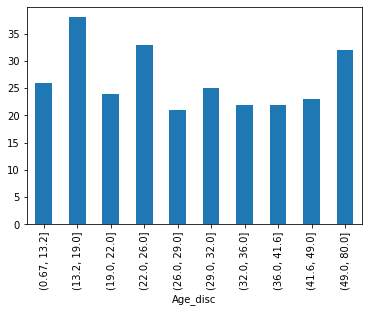

In [27]:
X_test.groupby('Age_disc')['Age'].count().plot.bar()